<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Modeling-Your-Data---Lab" data-toc-modified-id="Modeling-Your-Data---Lab-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Modeling Your Data - Lab</a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Objectives" data-toc-modified-id="Objectives-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Objectives</a></span></li><li><span><a href="#Build-an-Initial-Regression-Model" data-toc-modified-id="Build-an-Initial-Regression-Model-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Build an Initial Regression Model</a></span></li><li><span><a href="#Remove-the-Uninfluential-Features" data-toc-modified-id="Remove-the-Uninfluential-Features-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Remove the Uninfluential Features</a></span></li><li><span><a href="#Investigate-Multicollinearity" data-toc-modified-id="Investigate-Multicollinearity-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Investigate Multicollinearity</a></span></li><li><span><a href="#Perform-Another-Round-of-Feature-Selection" data-toc-modified-id="Perform-Another-Round-of-Feature-Selection-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Perform Another Round of Feature Selection</a></span></li><li><span><a href="#Check-the-Normality-Assumption" data-toc-modified-id="Check-the-Normality-Assumption-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Check the Normality Assumption</a></span></li><li><span><a href="#Check-Homoscedasticity-Assumption" data-toc-modified-id="Check-Homoscedasticity-Assumption-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Check Homoscedasticity Assumption</a></span></li><li><span><a href="#Make-Additional-Refinements" data-toc-modified-id="Make-Additional-Refinements-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Make Additional Refinements</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>Summary</a></span></li></ul></li></ul></div>

# Modeling Your Data - Lab

## Introduction 

In this lab you'll perform a full linear regression analysis on the data. You'll implement the process demonstrated in the previous lesson, taking a stepwise approach to analyze and improve the model along the way.

## Objectives
You will be able to:

* Perform a full linear regression with iterations based on p-value of features and other parameters
* Create visualizations to better understand the distributions of variables in a dataset
* Determine whether or not the assumptions for linear regression hold true for this example

## Build an Initial Regression Model

To start, perform a train-test split and create an initial regression model to model the `list_price` using all of your available features.

> **Note:** In order to write the model you'll have to do some tedious manipulation of your column names. Statsmodels will not allow you to have spaces, apostrophe or arithmetic symbols (+) in your column names. Preview them and refine them as you go.  
**If you receive an error such as "PatsyError: error tokenizing input (maybe an unclosed string?)", then you need to further preprocess your column names.**

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [6]:
# Import the dataset 'Lego_dataset_cleaned.csv'
df = pd.read_csv('Lego_dataset_cleaned.csv')
df.head()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10+,ages_10-14,ages_10-16,ages_10-21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very Challenging,review_difficulty_Very Easy,review_difficulty_unknown
0,-0.273020,29.99,-0.398512,-0.655279,-0.045687,-0.365010,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,-0.404154,19.99,-0.398512,-0.655279,0.990651,-0.365010,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,-0.517242,12.99,-0.147162,-0.132473,-0.460222,-0.204063,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0.635296,99.99,0.187972,-1.352353,0.161581,0.117830,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0.288812,79.99,-0.063378,-2.049427,0.161581,-0.204063,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [7]:
# Your code here - Manipulate column names
subs = [(' ', '_'),('.',''),("'",""),('™', ''), ('®',''),
        ('+','plus'), ('½','half'), ('-','_')
       ]
def col_formatting(col):
    for old, new in subs:
        col = col.replace(old,new)
    return col

In [8]:
# Your code here - Define the target and predictors
df.columns = [col_formatting(col) for col in df.columns]

In [9]:
list(df.columns)

['piece_count',
 'list_price',
 'num_reviews',
 'play_star_rating',
 'star_rating',
 'val_star_rating',
 'ages_10plus',
 'ages_10_14',
 'ages_10_16',
 'ages_10_21',
 'ages_11_16',
 'ages_12plus',
 'ages_12_16',
 'ages_14plus',
 'ages_16plus',
 'ages_1half_3',
 'ages_1half_5',
 'ages_2_5',
 'ages_4plus',
 'ages_4_7',
 'ages_4_99',
 'ages_5plus',
 'ages_5_12',
 'ages_5_8',
 'ages_6plus',
 'ages_6_12',
 'ages_6_14',
 'ages_7plus',
 'ages_7_12',
 'ages_7_14',
 'ages_8plus',
 'ages_8_12',
 'ages_8_14',
 'ages_9plus',
 'ages_9_12',
 'ages_9_14',
 'ages_9_16',
 'theme_name_Angry_Birds',
 'theme_name_Architecture',
 'theme_name_BOOST',
 'theme_name_Blues_Helicopter_Pursuit',
 'theme_name_BrickHeadz',
 'theme_name_Carnotaurus_Gyrosphere_Escape',
 'theme_name_City',
 'theme_name_Classic',
 'theme_name_Creator_3_in_1',
 'theme_name_Creator_Expert',
 'theme_name_DC_Comics_Super_Heroes',
 'theme_name_DC_Super_Hero_Girls',
 'theme_name_DIMENSIONS',
 'theme_name_DUPLO',
 'theme_name_Dilophosaurus_Out

In [10]:
# Your code here - Split into train and test
# Defining the problem
outcome = 'list_price'
x_cols = list(df.columns)
x_cols.remove(outcome)

In [11]:
train, test = train_test_split(df)

In [12]:
print(len(train), len(test))
train.head()

8152 2718


,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10plus,ages_10_14,ages_10_16,ages_10_21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very_Challenging,review_difficulty_Very_Easy,review_difficulty_unknown
4225,-0.425809,67.0878,-0.286801,0.216064,0.161581,0.117830,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5481,-0.200836,60.9390,-0.007523,-1.352353,-2.532897,-2.457318,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9175,-0.306705,15.8478,-0.398512,1.087407,0.990651,1.244458,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
105,-0.209257,49.9900,-0.370585,0.564601,-0.460222,-0.365010,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
7822,-0.165947,42.6878,-0.119234,0.216064,0.576116,0.278777,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [13]:
test.head()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10plus,ages_10_14,ages_10_16,ages_10_21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very_Challenging,review_difficulty_Very_Easy,review_difficulty_unknown
10231,-0.356031,26.0971,-0.007523,0.041796,0.161581,0.278777,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
546,-0.523257,9.9900,-0.286801,0.216064,0.161581,0.117830,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
6831,-0.384905,18.1860,-0.147162,0.738870,0.368848,0.761617,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
47,-0.487165,9.9900,-0.203018,-1.526621,-0.460222,0.600671,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
7517,-0.603863,10.9678,0.662745,-0.481010,-1.289292,-2.296371,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [14]:

# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     539.7
Date:                Sat, 02 May 2020   Prob (F-statistic):               0.00
Time:                        10:41:22   Log-Likelihood:                -40480.
No. Observations:                8152   AIC:                         8.115e+04
Df Residuals:                    8057   BIC:                         8.181e+04
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           63.5083      1.837     34.567      0.000      59.907      67.110
piece_count                                         77.3281      0.896     86.294      0.000      75.571      79.085
num_reviews                                          6.4456      0.697      9.254      0.000       5.080       7.811
play_star_rating                                     5.7980      0.624      9.292      0.000       4.575       7.021
star_rating                                         -1.4972      0.708     -2.116      0.034      -2.884      -0.110
val_star_rating                                     -8.4104      0.633    -13.287      0.000      -9.651      -7.170
ages_10plus                                        126.9058      6.814     18.625      0.000     113.549     140.263
ages_10_14                                         -20.8647      8.681     -2.404      0.016     -37.881      -3.848
ages_10_16                                         -11.5483      4.229     -2.731      0.006     -19.838      -3.259
ages_10_21                                          50.2404      7.729      6.501      0.000      35.090      65.390
ages_11_16                                         -19.1989      5.846     -3.284      0.001     -30.659      -7.739
ages_12plus                                         64.5547      5.740     11.246      0.000      53.303      75.807
ages_12_16                                         -64.0079      6.978     -9.172      0.000     -77.687     -50.329
ages_14plus                                         26.9008      4.216      6.381      0.000      18.636      35.165
ages_16plus                                         25.8007      6.179      4.175      0.000      13.687      37.914
ages_1half_3                                        -8.2653      2.341     -3.530      0.000     -12.855      -3.676
ages_1half_5                                        -4.6951      3.057     -1.536      0.125     -10.688       1.297
ages_2_5                                            15.0926      1.694      8.909      0.000      11.772      18.414
ages_4plus                                         -18.3688      6.298     -2.916      0.004     -30.715      -6.022
ages_4_7                                            -6.0304      3.509     -1.719      0.086     -12.908       0.848
ages_4_99                                           -3.0177      3.593     -0.840      0.401     -10.061       4.026
ages_5plus                                          -8.8966      3.001     -2.964      0.003     -14.780      -3.014
ages_5_12                                          -33.5962      3.267    -10.282      0.000     -40.001     -27.191
ages_5_8                                 

## Remove the Uninfluential Features

Based on the initial model, remove those features which do not appear to be statistically relevant and rerun the model.

In [15]:
# Your code here - Remove features which do not appear to be statistically relevant
# Extract the p-value table from the summary and use it to subset our features
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

103 73
['piece_count', 'num_reviews', 'play_star_rating', 'star_rating', 'val_star_rating']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,63.5083,1.837,34.567,0.000,59.907,67.110
piece_count,77.3281,0.896,86.294,0.000,75.571,79.085
num_reviews,6.4456,0.697,9.254,0.000,5.080,7.811
play_star_rating,5.7980,0.624,9.292,0.000,4.575,7.021
star_rating,-1.4972,0.708,-2.116,0.034,-2.884,-0.110


In [16]:
# Your code here - Refit the model
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     704.7
Date:                Sat, 02 May 2020   Prob (F-statistic):               0.00
Time:                        10:41:23   Log-Likelihood:                -40489.
No. Observations:                8152   AIC:                         8.112e+04
Df Residuals:                    8079   BIC:                         8.164e+04
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           62.6671      2.081     30.119      0.000      58.589      66.746
piece_count                                         77.4525      0.877     88.321      0.000      75.733      79.172
num_reviews                                          6.4444      0.682      9.455      0.000       5.108       7.780
play_star_rating                                     5.8578      0.611      9.594      0.000       4.661       7.055
star_rating                                         -1.3705      0.693     -1.978      0.048      -2.729      -0.012
val_star_rating                                     -8.4522      0.603    -14.019      0.000      -9.634      -7.270
ages_10plus                                        125.2789      4.869     25.729      0.000     115.734     134.824
ages_10_14                                         -16.4481      8.975     -1.833      0.067     -34.041       1.144
ages_10_16                                          -7.3157      3.984     -1.836      0.066     -15.126       0.494
ages_10_21                                          47.0412      3.252     14.464      0.000      40.666      53.417
ages_11_16                                         -15.2211      5.610     -2.713      0.007     -26.217      -4.225
ages_12plus                                         66.6439      6.218     10.718      0.000      54.455      78.833
ages_12_16                                         -59.9551      7.270     -8.247      0.000     -74.206     -45.704
ages_14plus                                         30.7508      4.772      6.445      0.000      21.397      40.104
ages_16plus                                         29.2702      6.840      4.279      0.000      15.862      42.678
ages_1half_3                                        -1.1757      3.012     -0.390      0.696      -7.080       4.728
ages_2_5                                            21.9486      1.983     11.070      0.000      18.062      25.835
ages_4plus                                         -15.2376      9.658     -1.578      0.115     -34.170       3.695
ages_5plus                                          -6.3961      2.992     -2.138      0.033     -12.261      -0.532
ages_5_12                                          -28.1383      2.696    -10.435      0.000     -33.424     -22.853
ages_6plus                                         -21.5435      5.431     -3.967      0.000     -32.190     -10.897
ages_6_12                                          -15.7544      1.879     -8.386      0.000     -19.437     -12.072
ages_7_12                                          -14.9195      2.220     -6.721      0.000     -19.271     -10.568
ages_7_14                                

> **Comment:** You should see that the model performance is identical. Additionally, observe that there are further features which have been identified as unimpactful. Continue to refine the model accordingly.

In [17]:
# Your code here - Continue to refine the model
# Extract the p-value table from the summary and use it to subset our features
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

74 60
['piece_count', 'num_reviews', 'play_star_rating', 'star_rating', 'val_star_rating']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,62.6671,2.081,30.119,0.000,58.589,66.746
piece_count,77.4525,0.877,88.321,0.000,75.733,79.172
num_reviews,6.4444,0.682,9.455,0.000,5.108,7.780
play_star_rating,5.8578,0.611,9.594,0.000,4.661,7.055
star_rating,-1.3705,0.693,-1.978,0.048,-2.729,-0.012


In [18]:
# Your code here - Refit the model
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     858.4
Date:                Sat, 02 May 2020   Prob (F-statistic):               0.00
Time:                        10:41:25   Log-Likelihood:                -40501.
No. Observations:                8152   AIC:                         8.112e+04
Df Residuals:                    8092   BIC:                         8.154e+04
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           64.2613      1.263     50.874      0.000      61.785      66.737
piece_count                                         77.2400      0.855     90.387      0.000      75.565      78.915
num_reviews                                          5.8455      0.627      9.328      0.000       4.617       7.074
play_star_rating                                     6.1089      0.602     10.150      0.000       4.929       7.289
star_rating                                         -1.4930      0.687     -2.173      0.030      -2.840      -0.146
val_star_rating                                     -8.4971      0.600    -14.172      0.000      -9.672      -7.322
ages_10plus                                        127.5444      4.768     26.748      0.000     118.197     136.892
ages_10_21                                          47.5606      3.171     14.996      0.000      41.344      53.778
ages_11_16                                         -12.1522      5.460     -2.226      0.026     -22.854      -1.450
ages_12plus                                         70.3137      6.066     11.592      0.000      58.424      82.204
ages_12_16                                         -55.7171      7.092     -7.856      0.000     -69.620     -41.814
ages_14plus                                         37.5099      4.163      9.010      0.000      29.349      45.671
ages_16plus                                         35.6593      6.474      5.508      0.000      22.968      48.351
ages_2_5                                            22.8737      1.850     12.367      0.000      19.248      26.499
ages_5plus                                          -6.6794      2.894     -2.308      0.021     -12.353      -1.006
ages_5_12                                          -26.8867      2.600    -10.341      0.000     -31.984     -21.790
ages_6plus                                         -19.7722      5.366     -3.685      0.000     -30.291      -9.253
ages_6_12                                          -13.7645      1.680     -8.192      0.000     -17.058     -10.471
ages_7_12                                          -12.9961      2.039     -6.375      0.000     -16.993      -9.000
ages_7_14                                           -9.6200      1.800     -5.344      0.000     -13.149      -6.091
ages_8plus                                          16.0341      4.529      3.540      0.000       7.156      24.913
ages_8_12                                          -12.0852      2.608     -4.634      0.000     -17.198      -6.973
ages_8_14                                           -8.5641      1.907     -4.491      0.000     -12.302      -4.826
ages_9plus                               

## Investigate Multicollinearity

There are still a lot of features in the current model! Chances are there are some strong multicollinearity issues. Begin to investigate the extent of this problem.

In [19]:
# Your code here - Code a way to identify multicollinearity
# Your code here
X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

/Users/badmin/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


[('piece_count', 4.408193319342474),
 ('num_reviews', 2.490073581742189),
 ('play_star_rating', 2.3909693152770717),
 ('star_rating', 3.156512760906442),
 ('val_star_rating', 2.375437824603543),
 ('ages_10plus', 7.099085652406446),
 ('ages_10_21', 1.0514366516299316),
 ('ages_11_16', 1.1413175248104535),
 ('ages_12plus', 6.120694654281864),
 ('ages_12_16', 1.1778174105960284),
 ('ages_14plus', 1.8380593635185496),
 ('ages_16plus', 9.006925897187166),
 ('ages_2_5', 1.1823192064300025),
 ('ages_5plus', inf),
 ('ages_5_12', 3.213461811662213),
 ('ages_6plus', 2.6646858877606534),
 ('ages_6_12', 1.850725649735187),
 ('ages_7_12', 1.4572451220476992),
 ('ages_7_14', 1.9068730559493337),
 ('ages_8plus', 2.581987178560332),
 ('ages_8_12', 1.250206192620639),
 ('ages_8_14', 1.9152175832047702),
 ('ages_9plus', 1.4082139442186392),
 ('ages_9_12', 1.0185567362890573),
 ('ages_9_14', 1.8092268046804432),
 ('theme_name_Architecture', 5.230590905667264),
 ('theme_name_BOOST', 1.0645342453158602),
 

## Perform Another Round of Feature Selection

Once again, subset your features based on your findings above. Then rerun the model once again.

In [20]:
# Your code here - Subset features based on multicollinearity
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

60 53


In [21]:
# Your code here - Refit model with subset features
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     856.7
Date:                Sat, 02 May 2020   Prob (F-statistic):               0.00
Time:                        10:41:27   Log-Likelihood:                -40885.
No. Observations:                8152   AIC:                         8.188e+04
Df Residuals:                    8098   BIC:                         8.226e+04
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           67.0341      1.095     61.234      0.000      64.888      69.180
piece_count                                         79.0102      0.698    113.265      0.000      77.643      80.378
num_reviews                                          3.9515      0.614      6.440      0.000       2.749       5.154
play_star_rating                                     7.2193      0.555     12.999      0.000       6.131       8.308
star_rating                                         -2.1532      0.696     -3.092      0.002      -3.518      -0.788
val_star_rating                                     -9.7041      0.624    -15.556      0.000     -10.927      -8.481
ages_10_21                                          44.4347      3.275     13.569      0.000      38.015      50.854
ages_11_16                                         -22.9522      5.441     -4.218      0.000     -33.619     -12.286
ages_12_16                                         -68.4377      7.055     -9.700      0.000     -82.268     -54.607
ages_14plus                                         17.6056      3.670      4.798      0.000      10.412      24.799
ages_2_5                                            20.4061      1.828     11.165      0.000      16.823      23.989
ages_5_12                                          -30.8155      2.667    -11.554      0.000     -36.044     -25.587
ages_6plus                                         -23.8477      5.581     -4.273      0.000     -34.787     -12.908
ages_6_12                                          -19.1874      1.644    -11.674      0.000     -22.409     -15.965
ages_7_12                                          -17.4353      2.048     -8.515      0.000     -21.449     -13.422
ages_7_14                                          -14.3238      1.787     -8.016      0.000     -17.826     -10.821
ages_8plus                                           3.3634      4.612      0.729      0.466      -5.677      12.404
ages_8_12                                          -16.8266      2.597     -6.478      0.000     -21.918     -11.735
ages_8_14                                          -15.0860      1.872     -8.061      0.000     -18.755     -11.417
ages_9plus                                          17.0107     10.245      1.660      0.097      -3.073      37.094
ages_9_12                                          -28.1431      6.397     -4.400      0.000     -40.682     -15.604
ages_9_14                                          -13.6037      2.519     -5.400      0.000     -18.542      -8.665
theme_name_BOOST                                    89.3326     10.073      8.868      0.000      69.586     109.079
theme_name_Blues_Helicopter_Pursuit      

## Check the Normality Assumption

Check whether the normality assumption holds for your model.

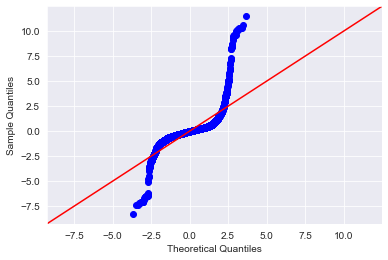

In [22]:
# Your code here - Check that the residuals are normally distributed
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

## Check Homoscedasticity Assumption

Check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

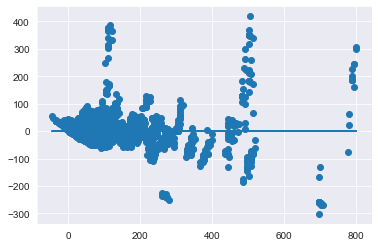

In [23]:
# Your code here - Check that the residuals are homoscedastic
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

> **Comment:** This displays a fairly pronounced 'funnel' shape: errors appear to increase as the `list_price` increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confining the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

## Make Additional Refinements

From here, make additional refinements to your model based on the above analysis. As you progress, continue to go back and check the assumptions for the updated model. Be sure to attempt at least two additional model refinements.

> **Comment:** Based on the above plots, it seems as though outliers are having a substantial impact on the model. As such, removing outliers may be appropriate. Investigating the impact of a log transformation is also worthwhile.

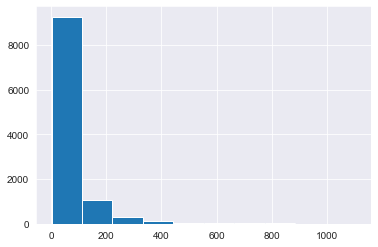

In [24]:
# Your code here - Check for outliers
df.list_price.hist()

In [25]:
# Your code here
# Remove extreme outliers
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.list_price.quantile(q=q)))

# Rerun the model

0.8 percentile: 90.986
0.81 percentile: 92.66216100000052
0.82 percentile: 97.5878
0.83 percentile: 101.898
0.84 percentile: 109.13971199999885
0.85 percentile: 110.352
0.86 percentile: 119.96492
0.87 percentile: 121.9878
0.88 percentile: 121.9878
0.89 percentile: 134.18779999999998
0.9 percentile: 143.952
0.91 percentile: 153.986
0.92 percentile: 170.7878
0.93 percentile: 182.9878
0.94 percentile: 198.7929
0.95 percentile: 220.03032999999942
0.96 percentile: 251.90543999999994
0.97 percentile: 292.7878
0.98 percentile: 359.88
0.99 percentile: 463.5878


In [26]:
# Your code here - Check normality assumption
orig_tot = len(df)
df = df[df.list_price < 450] # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(df))/orig_tot)
df.list_price = df.list_price.map(np.log) # Applying a log transformation
train, test = train_test_split(df)

# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

Percent removed: 0.010487580496780129


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     470.5
Date:                Sat, 02 May 2020   Prob (F-statistic):               0.00
Time:                        10:41:28   Log-Likelihood:                -4947.3
No. Observations:                8067   AIC:                         1.000e+04
Df Residuals:                    8013   BIC:                         1.038e+04
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            3.3855      0.014    244.907      0.000       3.358       3.413
piece_count                                          0.6121      0.010     62.016      0.000       0.593       0.631
num_reviews                                         -0.0121      0.008     -1.587      0.113      -0.027       0.003
play_star_rating                                     0.1107      0.007     16.322      0.000       0.097       0.124
star_rating                                         -0.0528      0.008     -6.230      0.000      -0.069      -0.036
val_star_rating                                     -0.1133      0.008    -14.936      0.000      -0.128      -0.098
ages_10_21                                           0.6998      0.041     17.062      0.000       0.619       0.780
ages_11_16                                           0.2916      0.068      4.301      0.000       0.159       0.424
ages_12_16                                          -0.0908      0.093     -0.973      0.331      -0.274       0.092
ages_14plus                                          0.3784      0.049      7.739      0.000       0.283       0.474
ages_2_5                                             0.5101      0.022     23.149      0.000       0.467       0.553
ages_5_12                                           -0.7185      0.033    -22.019      0.000      -0.782      -0.655
ages_6plus                                          -0.9043      0.071    -12.751      0.000      -1.043      -0.765
ages_6_12                                           -0.1497      0.020     -7.349      0.000      -0.190      -0.110
ages_7_12                                            0.1070      0.025      4.210      0.000       0.057       0.157
ages_7_14                                            0.0153      0.022      0.690      0.490      -0.028       0.059
ages_8plus                                           0.6025      0.056     10.843      0.000       0.494       0.711
ages_8_12                                            0.2715      0.032      8.504      0.000       0.209       0.334
ages_8_14                                            0.3370      0.023     14.877      0.000       0.293       0.381
ages_9plus                                           0.1771      0.125      1.417      0.156      -0.068       0.422
ages_9_12                                            0.4221      0.073      5.751      0.000       0.278       0.566
ages_9_14                                            0.4661      0.031     14.816      0.000       0.404       0.528
theme_name_BOOST                                     0.9823      0.116      8.466      0.000       0.755       1.210
theme_name_Blues_Helicopter_Pursuit      

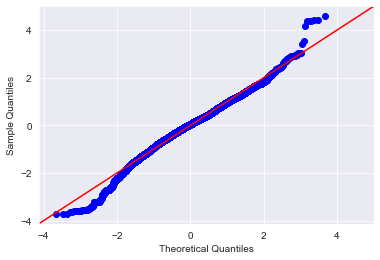

In [27]:
# Your code here - Check the Homoscedasticity Assumption
# Comment: This is much, much better!
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

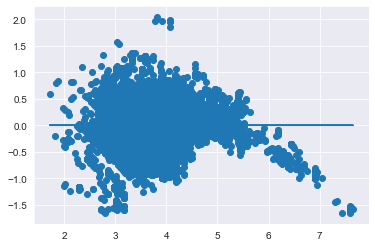

In [28]:
# Your code goes here
# Comment: There is still a clear underestimate now by the model as the log transformed 
# list price increases, but the model is much improved. Further subsetting is potentially warranted.
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

0.8 percentile: 4.447203233446613
0.81 percentile: 4.512971560274537
0.82 percentile: 4.542526402035123
0.83 percentile: 4.580752485605895
0.84 percentile: 4.640913706863106
0.85 percentile: 4.6985494117910225
0.86 percentile: 4.718373863481943
0.87 percentile: 4.787408405976297
0.88 percentile: 4.8039210397329235
0.89 percentile: 4.826327766567244
0.9 percentile: 4.89924031131419
0.91 percentile: 4.976713742220571
0.92 percentile: 5.0490223265009595
0.93 percentile: 5.140421850231899
0.94 percentile: 5.209419483952433
0.95 percentile: 5.292263579298989
0.96 percentile: 5.391752152536553
0.97 percentile: 5.528952783620542
0.98 percentile: 5.678340376637527
0.99 percentile: 5.873347331375852


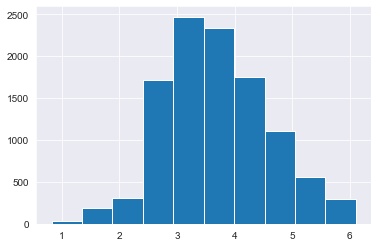

In [29]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.list_price.quantile(q=q)))

df.list_price.hist()

In [30]:
df = df[df.list_price <= 6]
train, test = train_test_split(df)

# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     469.8
Date:                Sat, 02 May 2020   Prob (F-statistic):               0.00
Time:                        10:41:29   Log-Likelihood:                -4724.1
No. Observations:                8027   AIC:                             9556.
Df Residuals:                    7973   BIC:                             9934.
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            3.4271      0.014    251.992      0.000       3.400       3.454
piece_count                                          0.6854      0.011     62.356      0.000       0.664       0.707
num_reviews                                         -0.0143      0.008     -1.783      0.075      -0.030       0.001
play_star_rating                                     0.1101      0.007     16.376      0.000       0.097       0.123
star_rating                                         -0.0498      0.008     -5.905      0.000      -0.066      -0.033
val_star_rating                                     -0.1099      0.007    -14.762      0.000      -0.125      -0.095
ages_10_21                                           0.7526      0.040     18.629      0.000       0.673       0.832
ages_11_16                                           0.1238      0.067      1.847      0.065      -0.008       0.255
ages_12_16                                          -0.3186      0.091     -3.504      0.000      -0.497      -0.140
ages_14plus                                          0.3246      0.049      6.560      0.000       0.228       0.422
ages_2_5                                             0.5080      0.022     23.244      0.000       0.465       0.551
ages_5_12                                           -0.7307      0.032    -22.708      0.000      -0.794      -0.668
ages_6plus                                          -0.9242      0.069    -13.451      0.000      -1.059      -0.789
ages_6_12                                           -0.1562      0.020     -7.872      0.000      -0.195      -0.117
ages_7_12                                            0.1031      0.024      4.219      0.000       0.055       0.151
ages_7_14                                           -0.0018      0.021     -0.086      0.931      -0.044       0.040
ages_8plus                                           0.5758      0.052     11.165      0.000       0.475       0.677
ages_8_12                                            0.2556      0.031      8.210      0.000       0.195       0.317
ages_8_14                                            0.3200      0.022     14.273      0.000       0.276       0.364
ages_9plus                                           0.1977      0.130      1.520      0.129      -0.057       0.453
ages_9_12                                            0.3761      0.071      5.317      0.000       0.237       0.515
ages_9_14                                            0.4427      0.031     14.256      0.000       0.382       0.504
theme_name_BOOST                                     0.9487      0.117      8.130      0.000       0.720       1.177
theme_name_Blues_Helicopter_Pursuit      

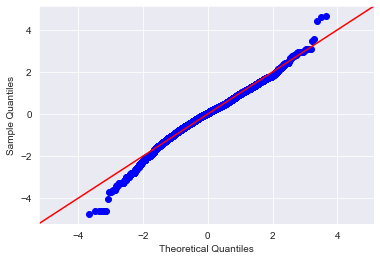

In [31]:
# Check the Normality Assumption
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

In [32]:
# Check the Homoscedasticity Assumption

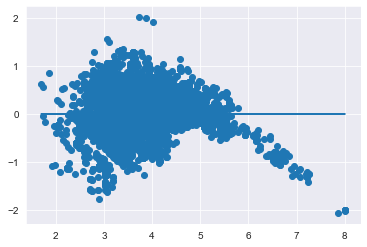

In [33]:
# Comment: No improvement observed
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

In [34]:
x_cols = ['piece_count', 'country_US']

In [35]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     4444.
Date:                Sat, 02 May 2020   Prob (F-statistic):               0.00
Time:                        10:41:30   Log-Likelihood:                -7416.9
No. Observations:                8027   AIC:                         1.484e+04
Df Residuals:                    8024   BIC:                         1.486e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.7365      0.007    528.150      0.000       3.723       3.750
piece_count     0.7981      0.009     93.589      0.000       0.781       0.815
country_US     -0.2683      0.027     -9.951      0.000      -0.321      -0.215
==============================================================================
Omnibus:                      469.737   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              694.071
Skew:                          -0.507   Prob(JB):                    1.92e-151
Kurtosis:                       4.022   Cond. No.                         4.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
# Checking Assumptions for Simplified Model

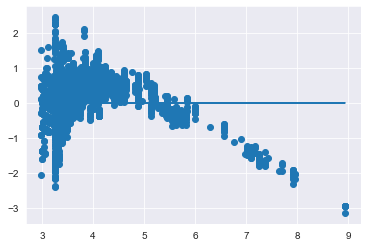

In [37]:
# Comment: Certainly not as strong a model, but with only 2 features, 
# over half the model performance was recovered.
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

## Summary

Well done! As you can see, regression can be a challenging task that requires you to make decisions along the way, try alternative approaches, and make ongoing refinements. These choices depend on the context and specific use cases. 